#1. Finding the dataset

I used car data.csv from Vehicle dataset available at Kaggle.

Link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataset_path = '/content/drive/My Drive/datasets/car_data.csv'

Visualizing data using tables and plots

In [8]:
#Loading csv file using pandas
df = pd.read_csv(dataset_path)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


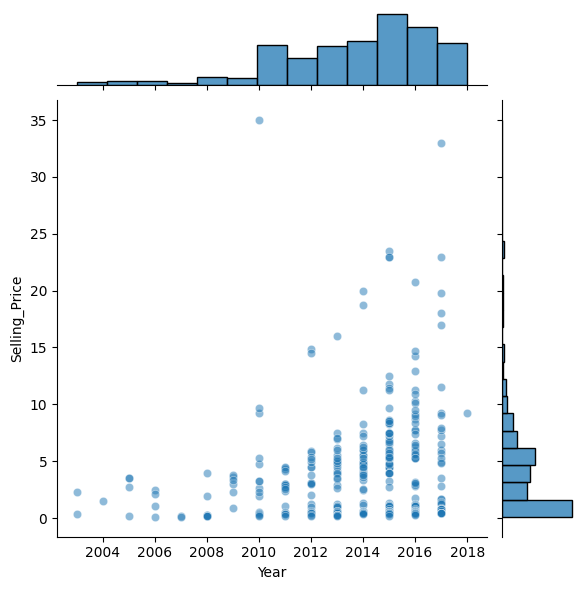

In [12]:
sns.jointplot(x='Year', y='Selling_Price', data=df, alpha=0.5)

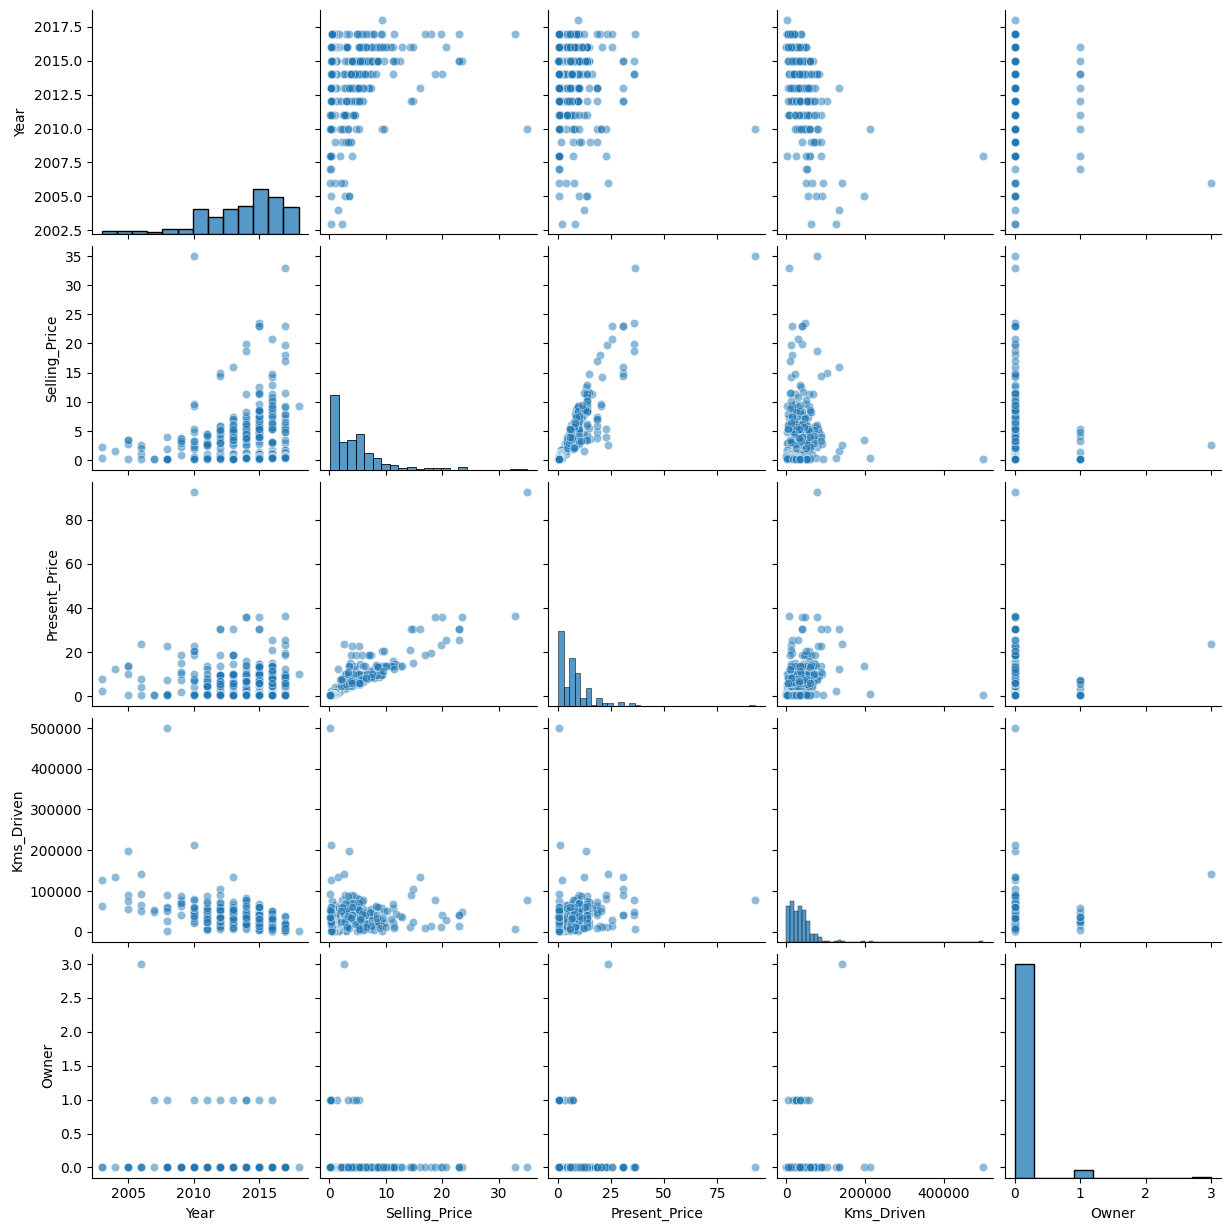

In [13]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5})

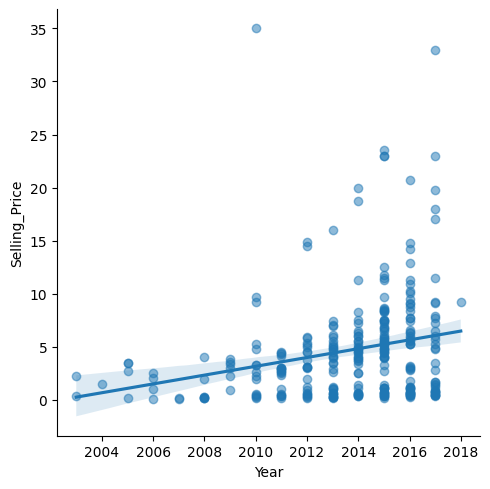

In [14]:
sns.lmplot(x='Year', y='Selling_Price', data=df, scatter_kws={'alpha':0.5})

#2. Data preprocessing for model training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [17]:
# Select the features that will be used to predict the target variable (car price).features = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
features = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
X = df[features]

# One-hot encode categorical features to represent them numerically for the model.
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for compatibility with train_test_split
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
X = pd.concat([X.drop(categorical_features, axis=1), encoded_df], axis=1)

# Target variable (What we want to predict)
y = df['Selling_Price']

In [18]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#3. Initializing and training the model

In [19]:
# Load Linear Regression model
lm = LinearRegression()

In [20]:
# Fit the data into model
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# Show Linear Regression coefficients (y = β0 + β1x1 + β2x2 + ... + βnxn)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Year,0.355836
Present_Price,0.417001
Kms_Driven,-0.000004
Owner,-1.030276
Fuel_Type_CNG,-1.143061
Fuel_Type_Diesel,1.568769
Fuel_Type_Petrol,-0.425708
Seller_Type_Dealer,0.576048
Seller_Type_Individual,-0.576048
Transmission_Automatic,0.719180


#5. Testing the model and visualizing the predictions

In [22]:
# Show model predictions on test set
predictions = lm.predict(X_test)
predictions

array([ 2.81694613,  8.0219717 ,  6.62419684, -1.47967587,  8.9148687 ,
        7.56978311,  1.38917767,  0.86717897,  1.41044792,  7.63177508,
        9.19555785,  0.64644643,  8.08030103,  3.2484837 ,  7.04658891,
        3.08477422,  0.50276806, 10.48960716,  1.790244  ,  2.35595178,
        0.43104472,  8.22753486,  6.74700642,  2.6123948 ,  0.83761863,
        3.65227549,  5.20869408,  2.81058233,  2.16740557,  1.79302018,
        0.43706542,  9.24076007, -0.61127887,  2.27699949,  8.70260141,
        4.45151727,  7.13407408,  7.39391401,  2.91857092,  7.77380479,
        3.86541561,  4.11807969,  4.27231023,  0.68712811,  7.48017157,
        0.53829335,  7.18097683, 10.86798394,  3.11706539,  5.57073621,
        6.5295263 ,  2.19802144, 20.26328169, 16.70924352,  7.68557671,
        9.37259627,  4.40061883,  9.0803589 ,  1.78645146,  7.31552873,
        0.28862714, -2.43218949,  1.98384337, -1.49297453,  4.71951589,
        1.83428505, 19.93406836, 18.06338799,  5.34629227, -0.53

Text(0.5, 1.0, 'Evaluation of LM model')

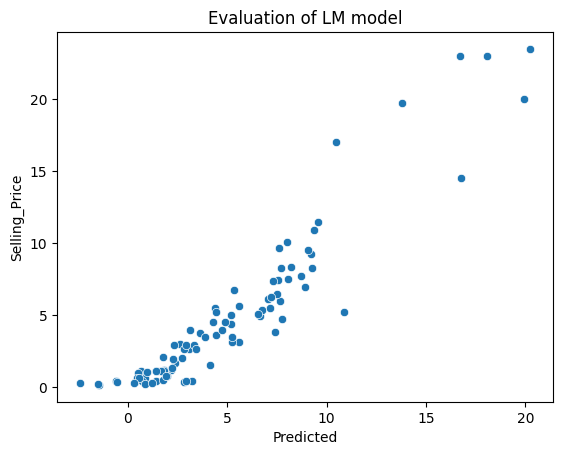

In [23]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted')
plt.title('Evaluation of LM model')

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [25]:
# Printing out important LR metrics with will help rate the model performance
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('RMSE:', math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.26983567090647
Mean Squared Error: 3.541748500949912
RMSE: 1.8819533737449268


The predicted selling price differs from the real selling price by only 1.27 units.

In [26]:
# Calculate residuals (we need to ensure that our output has normal distribution)
residuals = y_test - predictions

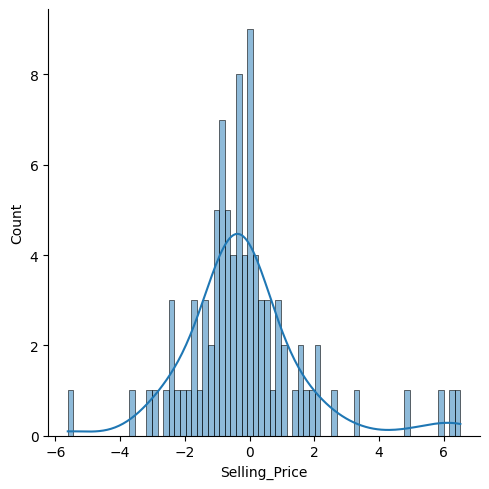

In [30]:
sns.displot(residuals, bins=70, kde=True)

In [ ]:
# As we can see it is a normal distribution